# Discente: **Jean Carlos de Carvalho Costa**

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Dados organizados com base na imagem
data = {
    "total_email": [8, 4],
    "Categoria": ["normal", "spam"],  # 'N' para não spam, 'S' para spam
    "Dear": [8, 2],         # Contagens da palavra "Dear"
    "Friend": [5, 1],       # Contagens da palavra "Friend"
    "Lunch": [3, 0],         # Contagens da palavra "Lunch"
    "Money": [1, 4]          # Contagens da palavra "Money"
}

# Criar o DataFrame
df = pd.DataFrame(data)

df

,total_email,Categoria,Dear,Friend,Lunch,Money
0,8,normal,8,5,3,1
1,4,spam,2,1,0,4


## Visualização dos números de palavras

In [27]:
teste = df.set_index('Categoria')
teste = teste.T
teste

Categoria,normal,spam
total_email,8,4
Dear,8,2
Friend,5,1
Lunch,3,0
Money,1,4


In [28]:
teste = teste.reset_index()

<Axes: xlabel='index', ylabel='normal'>

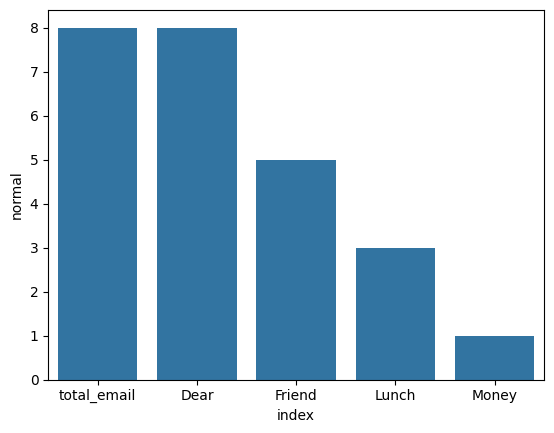

In [29]:
sns.barplot(teste, y='normal', x='index')

<Axes: xlabel='index', ylabel='spam'>

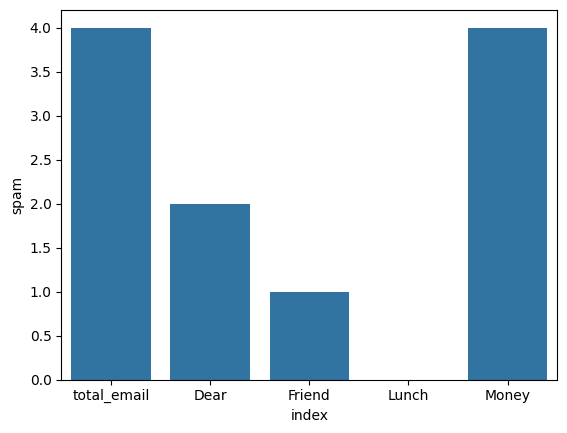

In [30]:
sns.barplot(teste, y='spam', x='index')

## Cálculo das probabilidade

In [34]:
df["totalAmostra"] = 0  # Inicializa a nova coluna
for i in range(2, 6):  # Para as colunas 1 até 4
    df["totalAmostra"] += df.iloc[:, i]  # Soma os valores das colunas
df

,total_email,Categoria,Dear,Friend,Lunch,Money,totalAmostra
0,8,normal,8,5,3,1,17
1,4,spam,2,1,0,4,7


In [39]:
df_prob = df.copy()
df_prob.set_index('Categoria', inplace=True)

In [40]:
df_prob

,total_email,Dear,Friend,Lunch,Money,totalAmostra
Categoria,,,,,,
normal,8,8,5,3,1,17
spam,4,2,1,0,4,7


In [41]:
for coluna in df_prob.columns:
    if coluna != 'totalAmostra' and coluna != 'total_email':
        df_prob[coluna] = (df_prob.loc[:, coluna] + 1) / (df_prob.loc[:, 'totalAmostra'] + 4)
df_prob = df_prob.reset_index()
df_prob

,Categoria,total_email,Dear,Friend,Lunch,Money,totalAmostra
0,normal,8,0.428571,0.285714,0.190476,0.095238,17
1,spam,4,0.272727,0.181818,0.090909,0.454545,7


## Aplicação do algoritmo

In [53]:
def classificar_sequencia_com_prob(sequencia, df_prob):
    # Extrair probabilidades
    df_normal = df_prob[df_prob['Categoria'] == 'normal'].drop(columns='Categoria')
    df_spam = df_prob[df_prob['Categoria'] == 'spam'].drop(columns='Categoria')

    prior_normal = df_prob.iloc[0,1] / df_prob['total_email'].sum()
    prior_spam = df_prob.iloc[1,1] / df_prob['total_email'].sum()

    posterior_normal = prior_normal
    posterior_spam = prior_spam

    for nova_palavra in sequencia:
        if nova_palavra not in df_normal.columns:
            return "Palavra não conhecida"

        prob_normal = df_normal[nova_palavra].values[0]
        prob_spam = df_spam[nova_palavra].values[0]

        posterior_normal *= prob_normal
        posterior_spam *= prob_spam

    if posterior_normal > posterior_spam:
        return "normal"
    else:
        return "spam"

In [54]:
# Testando a função
# sequencia = ["Lunch", "Money", "Money", "Money", "Money"]
sequencia = ["Dear", "Friend"]
categoria = classificar_sequencia_com_prob(sequencia, df_prob)
print(f"A sequência {' '.join(sequencia)} foi classificada como: {categoria}")

A sequência Dear Friend foi classificada como: normal
